In [17]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
neqs = length(y1)
    dydt = zeros(neqs) # allocate the vector of derivatives
    y = zeros(neqs, n) # allocate the matrix of solutions 
    h = t[2] - t[1]
    y[:, 1] = y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1 # : specifies that it is a column 
    end
    return t, y
end

myeulersv

In [18]:

"""

    dydt = funv(t ,y)

Right hands side of the oscillator with friction
"""

function frict(t, y)
    dydt = zeros(2)
    dydt[1] = y[2]
    dydt[2] = -y[1] - y[2]
    return dydt 
end

frict (generic function with 1 method)

In [19]:

a = 0
b = 10
n = 100
y1= [1.0, 0.0]


2-element Vector{Float64}:
 1.0
 0.0

In [20]:

t, y, = myeulersv(frict, a, b, n, y1)

(0.0:0.10101010101010101:10.0, [1.0 1.0 … -0.006372540748269553 -0.00682207512369449; 0.0 -0.10101010101010101 … -0.0044503903167068684 -0.00335716495660824])

In [22]:
using PyPlot

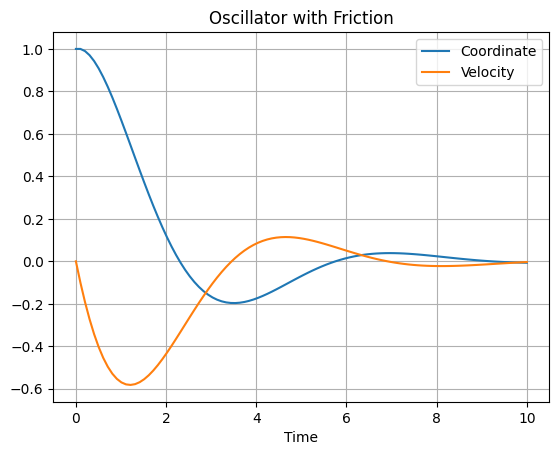

PyObject Text(0.5, 24.0, 'Time')

In [27]:

plot(t, y[1, :], label="Coordinate")
plot(t, y[2, :], label="Velocity")
grid(true)
title("Oscillator with Friction")
legend()
xlabel("Time")

In [31]:

plot(y[1, :], y[2, :])
grid(true)
scatter(y1)
title("Oscillator with Friction")
xlabel("Coordinate")
ylabel("Velocity")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/codespace/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("scatter() missing 1 required positional argument: 'y'")
  File "/home/codespace/.local/lib/python3.12/site-packages/matplotlib/_api/deprecation.py", line 453, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
